<h1>Website Traffic Analysis</h1>

The goal of this project is to understand this traffic better, in particular the volume and distribution of events, and to develop ideas on how to increase the links' click rates. With that in mind, please analyze the data using the Python libraries Pandas providing answers to the presented questions:
<ul>
[Pandas] How many total pageview events did the links in the provided dataset receive in the full period? How many per day?
<li>[Pandas] What about the other recorded events?</li>
<li>[Pandas] Which countries did the pageviews come from?</li>
<li>[Pandas] What was the overall click rate (clicks/pageviews)?</li>
<li>[Pandas] How does the clickrate distribute across different links?</li>
</ul>
Data Description
The data set provided (traffic.csv) contains web traffic data ("events") from a few different pages ("links") over a period of 7 days including various categorical dimensions about the geographic origin of that traffic as well as a page's content: isrc.Practicalities
Please work on the questions in the displayed order. Make sure that the solution reflects your entire thought process - it is more important how the code is structured rather than the final answers. You are expected to spend no more than 2-3 hours solving this project.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("./LinkFire.csv")
df

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
...,...,...,...,...,...,...,...,...,...
226273,pageview,2021-08-24,Kuwait,Kuwait City,Sean Paul,The Trinity,Temperature,USAT20505520,04ba6b17-1055-4f0e-a75e-3cdb0d0d4106
226274,pageview,2021-08-24,India,Chennai,Miscél,when you left,when you left,QM42K1907890,2fc15e8b-83aa-40ee-9f9d-5d96c6d4356c
226275,pageview,2021-08-24,India,Jaipur,"Trippie Redd, Lil Uzi Vert",Holy Smokes (feat. Lil Uzi Vert),Holy Smokes,QZJ842001118,eedc8702-6bd2-499a-972f-260c35f72e0f
226276,pageview,2021-08-24,France,Unknown,Young Thug,Tick Tock,Tick Tock,USAT22104514,e0a76dc3-7ccd-405f-8ee8-a2c55c0e0ed2


In [13]:

def event_states(df,event_type):
    df_event=df[df.event==event_type]
    df_event_by_date=df_event.groupby("date").size().reset_index()
    df_event_by_date.columns=["date","count"]
    try:
        int_return=int(df_event_by_date['count'].mean())
    except:
        int_return=0
    return len(df_event.index),int_return

<h3>How many total pageview events did the links in the provided dataset receive in the full period? How many per day?</h3>

In [14]:
toatal_pageview_events,average_event_per_day=event_states(df,"pageview")
print(f"Total pageview events receive in the full period:\t {toatal_pageview_events}")
print(f"Averge pageview events receive per day:\t\t\t {average_event_per_day}")

Total pageview events receive in the full period:	 142015
Averge pageview events receive per day:			 20287


<h3>What about the other recorded events?</h3>

In [15]:
for event_type in df.event.unique():
    print(event_type)
    toatal_events,average_event_per_day=event_states(df,event_type)
    print(f"Total {event_type} events receive in the full period:\t {toatal_events}")
    print(f"Averge {event_type} events receive per day:\t\t\t {average_event_per_day}")


click
Total click events receive in the full period:	 55732
Averge click events receive per day:			 7961
preview
Total preview events receive in the full period:	 28531
Averge preview events receive per day:			 4075
pageview
Total pageview events receive in the full period:	 142015
Averge pageview events receive per day:			 20287


<h3> Which countries did the pageviews come from? </h3>

In [16]:
df_pageview_country=df[df.event=="pageview"].groupby("country").size().reset_index()
df_pageview_country.columns=["country","count"]
df_pageview_country_sorted=df_pageview_country.sort_values("count",ascending=False)
df_pageview_country_sorted

,country,count
166,Saudi Arabia,28873
88,India,27286
201,United States,20839
65,France,9674
91,Iraq,4897
...,...,...
38,Central African Republic,1
206,Wallis and Futuna,1
155,Principality of Monaco,1
163,Saint Martin,1


<p><b><i>Here is the dataframe in which contries and there count are mentioned which hit the pageviews</b></i></p>

<h3>What was the overall click rate (clicks/pageviews)?</h3>

In [17]:
#the overall click rate is click/pageviews
toatal_pageview_events,_=event_states(df,"pageview")
toatal_click_events,_=event_states(df,"click")

print(f"Overall Click rate =\t {toatal_click_events/toatal_pageview_events}")

Overall Click rate =	 0.3924374185825441


<h3>How does the clickrate distribute across different links?</h3>

In [40]:
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [21]:
new_df={"linkid":[],"click_rate":[]}
for link_id in df.linkid.unique():
    temp_df=df[df["linkid"]==link_id]
    toatal_pageview_events,_=event_states(temp_df,"pageview")
    toatal_click_events,_=event_states(temp_df,"click")
    new_df["linkid"].append(link_id)
    if toatal_pageview_events==0:
        new_df["click_rate"].append(0)
    else:
        new_df['click_rate'].append(toatal_click_events/toatal_pageview_events)
#     print(f"Click rate =\t {toatal_click_events/toatal_pageview_events}")


In [22]:
new_df=pd.DataFrame(new_df)
new_df

,linkid,click_rate
0,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,0.384985
1,23199824-9cf5-4b98-942a-34965c3b0cc2,0.336070
2,35573248-4e49-47c7-af80-08a960fa74cd,0.530769
3,190c7170-4044-4c97-9709-926917155b02,0.394607
4,51a9a818-40d2-432d-b48a-9dcff61c6278,0.717949
...,...,...
3834,45fcc24e-a59d-5676-9e21-9ac8afbdb5e2,0.000000
3835,32cdf6e7-db55-5f8f-a838-61474934163b,0.000000
3836,4f98c8ce-9ef2-5a30-8bff-4dc1bf9bbe0d,0.000000
3837,70568d1b-81eb-5f7c-aac6-4b9f7bd907d0,0.000000


<Axes: >

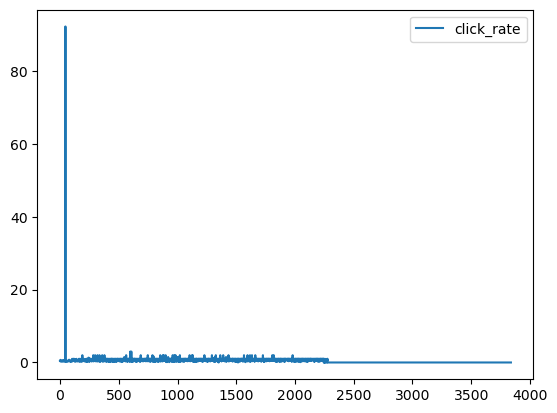

In [26]:
new_df.plot()